<a href="https://colab.research.google.com/github/Danie8904/Desistimiento-Creditos/blob/main/Modelos_Captacion_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proceso Modelamiento para clientes propensos a Desistir del Credito**



# **Conexión Drive**

In [ ]:
# Lectura de archivos en el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importar Librerias**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ShuffleSplit, KFold,cross_val_score, learning_curve
from sklearn.model_selection import cross_validate, ShuffleSplit
from imblearn.over_sampling import SMOTE
import joblib

# **Lectura de Datos**

In [ ]:
dataset = pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Base PRUEBA - ANALITICA.xlsx")

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,ZONA,PLAZO,CODEUDOR,VALOR_SOLICITADO,INGRESOS,EGRESOS,SUBTIPO_CLIENTE,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado
0,1,2017-01-02,0.0,29,0,F,Divorciado,Tecnólogico,Arrendada,2,ZONA BOGOTA,48,Si,4513950.0,1157971.36,576300.0,INFO,Independiente sin Establecimiento,B,85860.0,A,2,2190,Indefinido,10,Marca A,Aprobada
1,2,2017-01-02,0.0,60,1035000,F,Soltero,Tecnólogico,Arrendada,1,ZONA SUROCCIDENTE,48,Si,5301450.0,1253775.04,339000.0,INFO,Independiente sin Establecimiento,E,1270940.0,C,9,2142,Por Obra o Labor,131,Marca A,Desistida
2,3,2017-01-02,0.0,61,472500,M,Divorciado,Tecnólogico,Arrendada,1,ZONA CENTRO,36,Si,4961250.0,772189.60,226000.0,INFO,Independiente sin Establecimiento,E,664620.0,C,7,2073,Indefinido,63,Marca B,Anulada
3,4,2017-01-02,0.0,25,0,M,Casado,Tecnólogico,Arrendada,2,ZONA COSTA,36,Si,4513950.0,862400.00,395500.0,INFO,Independiente sin Establecimiento,B,51940.0,A,2,1929,Otra,12,Marca A,Negada
4,5,2017-01-02,0.0,30,3672000,F,Divorciado,Tecnólogico,Arrendada,3,ZONA SUROCCIDENTE,48,Si,7579950.0,2016000.00,1209100.0,FORM,Independiente sin Establecimiento,B,0.0,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,Anulada


 # **Exploración y limpieza de los datos (EDA)**

In [ ]:
print (dataset.shape)

(33668, 27)


In [ ]:
dataset.describe()

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,Puntaje Riesgo,ANTIGUEDAD
count,33668.000000,33668,3.366800e+04,33668.000000,3.366800e+04,33668.000000,33668.000000,3.366800e+04,3.366800e+04,3.366800e+04,3.366800e+04,33668.000000,33668.000000,33668.000000
mean,16834.500000,2017-06-03 21:53:52.172983296,7.647234e+04,34.103956,6.283836e+05,2.042028,36.404360,4.833895e+06,1.768666e+06,7.119266e+05,3.764307e+05,2.421944,1379.838897,39.079066
min,1.000000,2017-01-02 00:00:00,0.000000e+00,-1.000000,0.000000e+00,1.000000,6.000000,5.250000e+05,0.000000e+00,0.000000e+00,-2.554600e+05,0.000000,0.000000,0.000000
25%,8417.750000,2017-04-06 00:00:00,0.000000e+00,26.000000,1.305000e+05,1.000000,36.000000,3.726450e+06,1.041600e+06,3.390000e+05,0.000000e+00,1.000000,21.000000,8.000000
50%,16834.500000,2017-06-10 00:00:00,0.000000e+00,31.000000,4.278240e+05,2.000000,36.000000,4.608450e+06,1.344000e+06,5.650000e+05,1.049400e+05,2.000000,1803.000000,19.000000
75%,25251.250000,2017-07-31 00:00:00,0.000000e+00,39.000000,7.380000e+05,3.000000,36.000000,5.782875e+06,1.792000e+06,7.684000e+05,3.498000e+05,3.000000,2139.000000,43.000000
max,33668.000000,2017-12-31 00:00:00,6.679191e+06,2000.000000,9.900000e+06,29.000000,60.000000,1.363950e+07,1.563520e+08,8.554100e+07,1.425000e+08,89.000000,2742.000000,637.000000
std,9719.258768,NaN,3.007114e+05,16.251590,7.663405e+05,1.010997,8.509071,1.473938e+06,2.215846e+06,1.360024e+06,1.624263e+06,2.571922,907.210098,55.645814


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SOLICITUD          33668 non-null  int64         
 1   FECHA_INICIO       33668 non-null  datetime64[ns]
 2   MULTAS_SIMIT       33668 non-null  float64       
 3   EDAD               33668 non-null  int64         
 4   CUOTA_INICIAL      33668 non-null  int64         
 5   GENERO             33668 non-null  object        
 6   ESTADO_CIVIL       33668 non-null  object        
 7   NIVEL_ESTUDIO      33668 non-null  object        
 8   TIPO_VIVIENDA      33668 non-null  object        
 9   PERSONAS_CARGO     33668 non-null  int64         
 10  ZONA               33668 non-null  object        
 11  PLAZO              33668 non-null  int64         
 12  CODEUDOR           33668 non-null  object        
 13  VALOR_SOLICITADO   33668 non-null  float64       
 14  INGRES

# **Procesamiento de Datos**

## **Revision de datos faltantes**

In [ ]:
##Identificamos el número de missing values en cada columna
#dataset.isnull().sum()

## **Revisión de variables Objetivo**

In [ ]:
# Suponiendo que tu DataFrame se llama df
dataset['Estado'].value_counts()

,count
Estado,
Desistida,12265
Negada,10310
Aprobada,6939
Anulada,4154


In [ ]:
tabla_Estado = pd.DataFrame({
    'Frecuencia': dataset['Estado'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['Estado'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_Estado.loc['Total'] = [
    tabla_Estado['Frecuencia'].sum(),
    tabla_Estado['Porcentaje (%)'].sum()
]

tabla_Estado

,Frecuencia,Porcentaje (%)
Estado,,
Desistida,12265.0,36.0
Negada,10310.0,31.0
Aprobada,6939.0,21.0
Anulada,4154.0,12.0
Total,33668.0,100.0


In [ ]:
# Filtrar los datos para excluir los que están "en proceso"
#dataset_filtrado = dataset[dataset["estado"] != "en proceso"].copy()

### **Agrupamiento Variable Objetivo**

In [ ]:
# Crear una nueva variable binaria: 'desistio'
dataset["Desistio"] = dataset["Estado"].apply(lambda x: "Desistío" if x == "Desistida" else "No Desistido")

In [ ]:
tabla_Desistio = pd.DataFrame({
    'Frecuencia': dataset['Desistio'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['Desistio'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_Desistio.loc['Total'] = [
    tabla_Desistio['Frecuencia'].sum(),
    tabla_Desistio['Porcentaje (%)'].sum()
]

tabla_Desistio

,Frecuencia,Porcentaje (%)
Desistio,,
No Desistido,21403.0,64.0
Desistío,12265.0,36.0
Total,33668.0,100.0


## **Tratamiento Variable Edad**

In [ ]:
#Definición rango edades
dataset["edad_codi"] = dataset["EDAD"].apply(lambda x: x if 18 <= x <= 100 else np.nan)

In [ ]:
#Revisión Datos faltantes
dataset["edad_codi"].isna().sum()

np.int64(26)

In [ ]:
#Imputacióon por la media
dataset["edad_codi"] = dataset["edad_codi"].fillna(dataset["edad_codi"].median())

In [ ]:
# Categorización edades
bins = [18, 25, 35, 50, 65, 100]
labels = ['Joven', 'Adulto joven', 'Adulto', 'Adulto mayor', 'Mayor']

dataset["edad_categoria"] = pd.cut(dataset["edad_codi"], bins=bins, labels=labels, right=True, include_lowest=True)

In [ ]:
tabla_edad_categoria = pd.DataFrame({
    'Frecuencia': dataset['edad_categoria'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['edad_categoria'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_edad_categoria.loc['Total'] = [
    tabla_edad_categoria['Frecuencia'].sum(),
    tabla_edad_categoria['Porcentaje (%)'].sum()
]

tabla_edad_categoria

,Frecuencia,Porcentaje (%)
edad_categoria,,
Adulto joven,13674.0,41.0
Adulto,9279.0,28.0
Joven,7659.0,23.0
Adulto mayor,2662.0,8.0
Mayor,394.0,1.0
Total,33668.0,101.0


## **Tratamiento Variable Multas Simit**

In [ ]:
# Crea la nueva variable: "multas_binaria"
dataset["multas_codi"] = dataset["MULTAS_SIMIT"].apply(lambda x: "Sí" if x > 0 else "No")

In [ ]:
tabla_multas = pd.DataFrame({
    'Frecuencia': dataset['multas_codi'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['multas_codi'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_multas.loc['Total'] = [
    tabla_multas['Frecuencia'].sum(),
    tabla_multas['Porcentaje (%)'].sum()
]

tabla_multas

,Frecuencia,Porcentaje (%)
multas_codi,,
No,30386.0,90.0
Sí,3282.0,10.0
Total,33668.0,100.0


## **Tratamiento Variable Fecha**

In [ ]:
dataset["FECHA_INICIO"] = pd.to_datetime(dataset["FECHA_INICIO"], format="%d-%m-%Y")

dataset["mes"] = dataset["FECHA_INICIO"].dt.month                # Mes del año
#dataset["dia_semana"] = dataset["FECHA_INICIO"].dt.dayofweek     # 0 = lunes, 6 = domingo
dataset["nombre_dia"] = dataset["FECHA_INICIO"].dt.day_name()    # 'Monday', 'Tuesday', ...
#dataset["semana"] = dataset["FECHA_INICIO"].dt.isocalendar().week
#dataset["fin_de_semana"] = dataset["FECHA_INICIO"].isin([5, 6])  # True para sábado o domingo

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,ZONA,PLAZO,CODEUDOR,VALOR_SOLICITADO,INGRESOS,EGRESOS,SUBTIPO_CLIENTE,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado,Desistio,edad_codi,edad_categoria,multas_codi,mes,nombre_dia
0,1,2017-01-02,0.0,29,0,F,Divorciado,Tecnólogico,Arrendada,2,ZONA BOGOTA,48,Si,4513950.0,1157971.36,576300.0,INFO,Independiente sin Establecimiento,B,85860.0,A,2,2190,Indefinido,10,Marca A,Aprobada,No Desistido,29.0,Adulto joven,No,1,Monday
1,2,2017-01-02,0.0,60,1035000,F,Soltero,Tecnólogico,Arrendada,1,ZONA SUROCCIDENTE,48,Si,5301450.0,1253775.04,339000.0,INFO,Independiente sin Establecimiento,E,1270940.0,C,9,2142,Por Obra o Labor,131,Marca A,Desistida,Desistío,60.0,Adulto mayor,No,1,Monday
2,3,2017-01-02,0.0,61,472500,M,Divorciado,Tecnólogico,Arrendada,1,ZONA CENTRO,36,Si,4961250.0,772189.60,226000.0,INFO,Independiente sin Establecimiento,E,664620.0,C,7,2073,Indefinido,63,Marca B,Anulada,No Desistido,61.0,Adulto mayor,No,1,Monday
3,4,2017-01-02,0.0,25,0,M,Casado,Tecnólogico,Arrendada,2,ZONA COSTA,36,Si,4513950.0,862400.00,395500.0,INFO,Independiente sin Establecimiento,B,51940.0,A,2,1929,Otra,12,Marca A,Negada,No Desistido,25.0,Joven,No,1,Monday
4,5,2017-01-02,0.0,30,3672000,F,Divorciado,Tecnólogico,Arrendada,3,ZONA SUROCCIDENTE,48,Si,7579950.0,2016000.00,1209100.0,FORM,Independiente sin Establecimiento,B,0.0,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,Anulada,No Desistido,30.0,Adulto joven,No,1,Monday


## **Tratamiento Variable Genero**

In [ ]:
tabla_GENERO = pd.DataFrame({
    'Frecuencia': dataset['GENERO'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['GENERO'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_GENERO.loc['Total'] = [
    tabla_GENERO['Frecuencia'].sum(),
    tabla_GENERO['Porcentaje (%)'].sum()
]

tabla_GENERO

,Frecuencia,Porcentaje (%)
GENERO,,
F,22165.0,66.0
M,11503.0,34.0
Total,33668.0,100.0


## **Tratamiento Variable Genero**

In [ ]:
tabla_Estado_Civil = pd.DataFrame({
    'Frecuencia': dataset['ESTADO_CIVIL'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['ESTADO_CIVIL'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_Estado_Civil.loc['Total'] = [
    tabla_Estado_Civil['Frecuencia'].sum(),
    tabla_Estado_Civil['Porcentaje (%)'].sum()
]

tabla_Estado_Civil

,Frecuencia,Porcentaje (%)
ESTADO_CIVIL,,
Casado,15239.0,45.0
Divorciado,13215.0,39.0
Viudo,4480.0,13.0
Soltero,628.0,2.0
Unión Libre,106.0,0.0
Total,33668.0,99.0


## **Tratamiento variable Nivel Educativo**

In [ ]:
dataset["NIVEL_ESTUDIO_CODI"] = dataset["NIVEL_ESTUDIO"].replace({
    "Especialización": "Posgrado",
    "Postgrado": "Posgrado",
    "Secundaria": "Secundaria",
    "Bachillerato": "Secundaria",
    "Tecnólogico": "Tecnólogico",
    "Técnico": "Tecnólogico",
    "Universitario": "Universitario",
    "Universidad": "Universitario",
    "Ninguno": "Ninguno",
})

In [ ]:
tabla_NIVEL_ESTUDIO_CODI = pd.DataFrame({
    'Frecuencia': dataset['NIVEL_ESTUDIO_CODI'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['NIVEL_ESTUDIO_CODI'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_NIVEL_ESTUDIO_CODI.loc['Total'] = [
    tabla_NIVEL_ESTUDIO_CODI['Frecuencia'].sum(),
    tabla_NIVEL_ESTUDIO_CODI['Porcentaje (%)'].sum()
]

tabla_NIVEL_ESTUDIO_CODI

,Frecuencia,Porcentaje (%)
NIVEL_ESTUDIO_CODI,,
Tecnólogico,22919.0,68.0
Primaria,4458.0,13.0
Universitario,3314.0,10.0
Secundaria,1863.0,6.0
Posgrado,982.0,3.0
Ninguno,132.0,0.0
Total,33668.0,100.0


## **Tratamiento variable Tipo de Vivienda**

In [ ]:
dataset["TIPO_VIVIENDA_CODI"] = dataset["TIPO_VIVIENDA"].replace({
    "Arrendada": "Arrendada",
    "Propia sin hipoteca": "Propia",
    "Propia con hipoteca": "Propia con hipoteca",
    "Propia": "Propia",
    "Sin Patrimonio": "Arrendada",
    "Familiar": "Familiar",
})

In [ ]:
tabla_TIPO_VIVIENDA_CODI = pd.DataFrame({
    'Frecuencia': dataset['TIPO_VIVIENDA_CODI'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['TIPO_VIVIENDA_CODI'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_TIPO_VIVIENDA_CODI.loc['Total'] = [
    tabla_TIPO_VIVIENDA_CODI['Frecuencia'].sum(),
    tabla_TIPO_VIVIENDA_CODI['Porcentaje (%)'].sum()
]

tabla_TIPO_VIVIENDA_CODI

,Frecuencia,Porcentaje (%)
TIPO_VIVIENDA_CODI,,
Arrendada,22549.0,67.0
Propia,9025.0,27.0
Propia con hipoteca,2046.0,6.0
Familiar,48.0,0.0
Total,33668.0,100.0


## **Tratamiento variable Zona**

In [ ]:
dataset["ZONA_Codi"] = dataset["ZONA"].replace({
    "ZONA BOGOTA": "ZONA CENTRO",
    "ZONA SUROCCIDENTE": "ZONA SUROCCIDENTE",
    "ZONA CENTRO": "ZONA CENTRO",
    "ZONA COSTA": "ZONA COSTA",
    "ZONA ANTIOQUIA": "ZONA ANTIOQUIA",
    "ZONA EJE CAFETERO": "ZONA EJE CAFETERO",
    "ZONA ORIENTE": "ZONA ORIENTE",
})

In [ ]:
tabla_ZONA_Codi = pd.DataFrame({
    'Frecuencia': dataset['ZONA_Codi'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['ZONA_Codi'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_ZONA_Codi.loc['Total'] = [
    tabla_ZONA_Codi['Frecuencia'].sum(),
    tabla_ZONA_Codi['Porcentaje (%)'].sum()
]

tabla_ZONA_Codi

,Frecuencia,Porcentaje (%)
ZONA_Codi,,
ZONA SUROCCIDENTE,11344.0,34.0
ZONA CENTRO,7353.0,22.0
ZONA ANTIOQUIA,5263.0,16.0
ZONA COSTA,3710.0,11.0
ZONA EJE CAFETERO,3385.0,10.0
ZONA ORIENTE,2613.0,8.0
Total,33668.0,101.0


## **Tratamiento variable Codeudor**

In [ ]:
tabla_Codeudor = pd.DataFrame({
    'Frecuencia': dataset['CODEUDOR'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['CODEUDOR'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_Codeudor.loc['Total'] = [
    tabla_Codeudor['Frecuencia'].sum(),
    tabla_Codeudor['Porcentaje (%)'].sum()
]

tabla_Codeudor

,Frecuencia,Porcentaje (%)
CODEUDOR,,
Si,33168.0,99.0
No,500.0,1.0
Total,33668.0,100.0


## **Tratamiento variable Subtipo**

In [ ]:
tabla_subtipo = pd.DataFrame({
    'Frecuencia': dataset['SUBTIPO_CLIENTE'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['SUBTIPO_CLIENTE'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_subtipo.loc['Total'] = [
    tabla_subtipo['Frecuencia'].sum(),
    tabla_subtipo['Porcentaje (%)'].sum()
]

tabla_subtipo

,Frecuencia,Porcentaje (%)
SUBTIPO_CLIENTE,,
INFO,20819.0,62.0
FORM,12849.0,38.0
Total,33668.0,100.0


## **Tratamiento variable Habito de Pago**

In [ ]:
tabla_habito_pago = pd.DataFrame({
    'Frecuencia': dataset['HABITO_PAGO'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['HABITO_PAGO'].value_counts(normalize=True,dropna=False) * 100).round(0)
})

tabla_habito_pago.loc['Total'] = [
    tabla_habito_pago['Frecuencia'].sum(),
    tabla_habito_pago['Porcentaje (%)'].sum()
]

tabla_habito_pago

,Frecuencia,Porcentaje (%)
HABITO_PAGO,,
B,23073.0,69.0
E,8545.0,25.0
C,1208.0,4.0
A,388.0,1.0
K,273.0,1.0
D,181.0,1.0
Total,33668.0,101.0


## **Tratamiento variable Habito de Pago**

In [ ]:
tabla_TIPO_CLIENTE= pd.DataFrame({
    'Frecuencia':dataset['TIPO_CLIENTE'].value_counts(),
    'Porcentaje (%)': (dataset['TIPO_CLIENTE'].value_counts(normalize=True) * 100).round(1)
})

tabla_TIPO_CLIENTE

,Frecuencia,Porcentaje (%)
TIPO_CLIENTE,,
Independiente sin Establecimiento,27587,81.9
Empleado,3062,9.1
Independiente con Establecimiento,3019,9.0


## **Tratamiento Calificación Riesgo Crediticio**

In [ ]:
tabla_calificacion = pd.DataFrame({
    'Frecuencia': dataset['CALIFICACION'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['CALIFICACION'].value_counts(normalize=True,dropna=False) * 100).round(0)
})


tabla_calificacion.loc['Total'] = [
    tabla_calificacion['Frecuencia'].sum(),
    tabla_calificacion['Porcentaje (%)'].sum()
]

tabla_calificacion


,Frecuencia,Porcentaje (%)
CALIFICACION,,
A,27865.0,83.0
C,4861.0,14.0
B,347.0,1.0
AA,191.0,1.0
D,161.0,0.0
BB,86.0,0.0
E,80.0,0.0
K,67.0,0.0
CC,7.0,0.0


In [ ]:
## Imputacion por la moda "k" y "-""

moda = dataset['CALIFICACION'][~dataset['CALIFICACION'].isin(['K', '-'])].mode()[0]
dataset['CALIFICACION'] = dataset['CALIFICACION'].replace(['K', '-'], moda)

In [ ]:
calificacion_map = {
    'AA': 5,
    'A': 4,
    'BB': 3,
    'B': 2,
    'CC': 1,
    'C': 1,
    'D': 0,
    'E': 0,
    'F': 0
}
dataset['CALIFICACION_NUM'] = dataset['CALIFICACION'].map(calificacion_map)

In [ ]:
tabla_CALIFICACION_NUM = pd.DataFrame({
    'Frecuencia': dataset['CALIFICACION_NUM'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['CALIFICACION_NUM'].value_counts(normalize=True,dropna=False) * 100).round(0)
})


tabla_CALIFICACION_NUM.loc['Total'] = [
    tabla_CALIFICACION_NUM['Frecuencia'].sum(),
    tabla_CALIFICACION_NUM['Porcentaje (%)'].sum()
]

tabla_CALIFICACION_NUM

,Frecuencia,Porcentaje (%)
CALIFICACION_NUM,,
4,27935.0,83.0
1,4868.0,14.0
2,347.0,1.0
0,241.0,1.0
5,191.0,1.0
3,86.0,0.0
Total,33668.0,100.0


## **Tratamiento Calificación Tipo de Contrato**

In [ ]:
tabla_TIPO_CONTRATO = pd.DataFrame({
    'Frecuencia': dataset['TIPO_CONTRATO'].value_counts(dropna=False),
    'Porcentaje (%)': (dataset['TIPO_CONTRATO'].value_counts(normalize=True,dropna=False) * 100).round(1)
})

tabla_TIPO_CONTRATO.loc['Total'] = [
    tabla_TIPO_CONTRATO['Frecuencia'].sum(),
    tabla_TIPO_CONTRATO['Porcentaje (%)'].sum()
]

tabla_TIPO_CONTRATO

,Frecuencia,Porcentaje (%)
TIPO_CONTRATO,,
Por Obra o Labor,10059.0,29.9
INDEPENDIENTE SIN ESTABLECIMIENTO,7572.0,22.5
Indefinido,5210.0,15.5
Otra,3785.0,11.2
Temporal,3062.0,9.1
INDEPENDIENTE CON ESTABLECIMIENTO,3019.0,9.0
Libre Nombramiento,496.0,1.5
NaN,377.0,1.1
Carrera Administrati,32.0,0.1


In [ ]:
# Imputar por la moda Nan
moda = dataset['TIPO_CONTRATO'].mode()[0]

# Reemplazar NaN con la moda
dataset['TIPO_CONTRATO'] = dataset['TIPO_CONTRATO'].fillna(moda)

# **Selección de Variables para EDA y Modelamiento Predictivo**

In [ ]:
print(dataset.columns.tolist())

['SOLICITUD', 'FECHA_INICIO', 'MULTAS_SIMIT', 'EDAD', 'CUOTA_INICIAL', 'GENERO', 'ESTADO_CIVIL', 'NIVEL_ESTUDIO', 'TIPO_VIVIENDA', 'PERSONAS_CARGO', 'ZONA', 'PLAZO', 'CODEUDOR', 'VALOR_SOLICITADO', 'INGRESOS', 'EGRESOS', 'SUBTIPO_CLIENTE', 'TIPO_CLIENTE', 'HABITO_PAGO', 'ENDEUDAMIENTO', 'CALIFICACION', 'CREDITOS_VIGENTES', 'Puntaje Riesgo', 'TIPO_CONTRATO', 'ANTIGUEDAD', 'Marca producto', 'Estado', 'Desistio', 'edad_codi', 'edad_categoria', 'multas_codi', 'mes', 'nombre_dia', 'NIVEL_ESTUDIO_CODI', 'TIPO_VIVIENDA_CODI', 'ZONA_Codi', 'CALIFICACION_NUM']


In [ ]:
variables_interes = ['mes', 'nombre_dia', 'multas_codi', 'edad_categoria', 'CUOTA_INICIAL', 'GENERO', 'ESTADO_CIVIL', 'NIVEL_ESTUDIO_CODI', 'TIPO_VIVIENDA_CODI', 'PERSONAS_CARGO', 'ZONA_Codi', 'PLAZO', 'CODEUDOR', 'VALOR_SOLICITADO', 'INGRESOS', 'EGRESOS', 'SUBTIPO_CLIENTE','TIPO_CLIENTE','HABITO_PAGO','ENDEUDAMIENTO','CALIFICACION_NUM','CREDITOS_VIGENTES','Puntaje Riesgo','TIPO_CONTRATO','ANTIGUEDAD',"Marca producto","Desistio"]

In [ ]:
data_final = dataset[variables_interes].copy()

In [ ]:
data_final.head()

,mes,nombre_dia,multas_codi,edad_categoria,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO_CODI,TIPO_VIVIENDA_CODI,PERSONAS_CARGO,ZONA_Codi,PLAZO,CODEUDOR,VALOR_SOLICITADO,INGRESOS,EGRESOS,SUBTIPO_CLIENTE,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION_NUM,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Desistio
0,1,Monday,No,Adulto joven,0,F,Divorciado,Tecnólogico,Arrendada,2,ZONA CENTRO,48,Si,4513950.0,1157971.36,576300.0,INFO,Independiente sin Establecimiento,B,85860.0,4,2,2190,Indefinido,10,Marca A,No Desistido
1,1,Monday,No,Adulto mayor,1035000,F,Soltero,Tecnólogico,Arrendada,1,ZONA SUROCCIDENTE,48,Si,5301450.0,1253775.04,339000.0,INFO,Independiente sin Establecimiento,E,1270940.0,1,9,2142,Por Obra o Labor,131,Marca A,Desistío
2,1,Monday,No,Adulto mayor,472500,M,Divorciado,Tecnólogico,Arrendada,1,ZONA CENTRO,36,Si,4961250.0,772189.60,226000.0,INFO,Independiente sin Establecimiento,E,664620.0,1,7,2073,Indefinido,63,Marca B,No Desistido
3,1,Monday,No,Joven,0,M,Casado,Tecnólogico,Arrendada,2,ZONA COSTA,36,Si,4513950.0,862400.00,395500.0,INFO,Independiente sin Establecimiento,B,51940.0,4,2,1929,Otra,12,Marca A,No Desistido
4,1,Monday,No,Adulto joven,3672000,F,Divorciado,Tecnólogico,Arrendada,3,ZONA SUROCCIDENTE,48,Si,7579950.0,2016000.00,1209100.0,FORM,Independiente sin Establecimiento,B,0.0,4,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,No Desistido


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   mes                 33668 non-null  int32   
 1   nombre_dia          33668 non-null  object  
 2   multas_codi         33668 non-null  object  
 3   edad_categoria      33668 non-null  category
 4   CUOTA_INICIAL       33668 non-null  int64   
 5   GENERO              33668 non-null  object  
 6   ESTADO_CIVIL        33668 non-null  object  
 7   NIVEL_ESTUDIO_CODI  33668 non-null  object  
 8   TIPO_VIVIENDA_CODI  33668 non-null  object  
 9   PERSONAS_CARGO      33668 non-null  int64   
 10  ZONA_Codi           33668 non-null  object  
 11  PLAZO               33668 non-null  int64   
 12  CODEUDOR            33668 non-null  object  
 13  VALOR_SOLICITADO    33668 non-null  float64 
 14  INGRESOS            33668 non-null  float64 
 15  EGRESOS             33668 non-null  

In [ ]:
data_final.to_excel('data_final.xlsx', index=False)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.11/dist-packages/

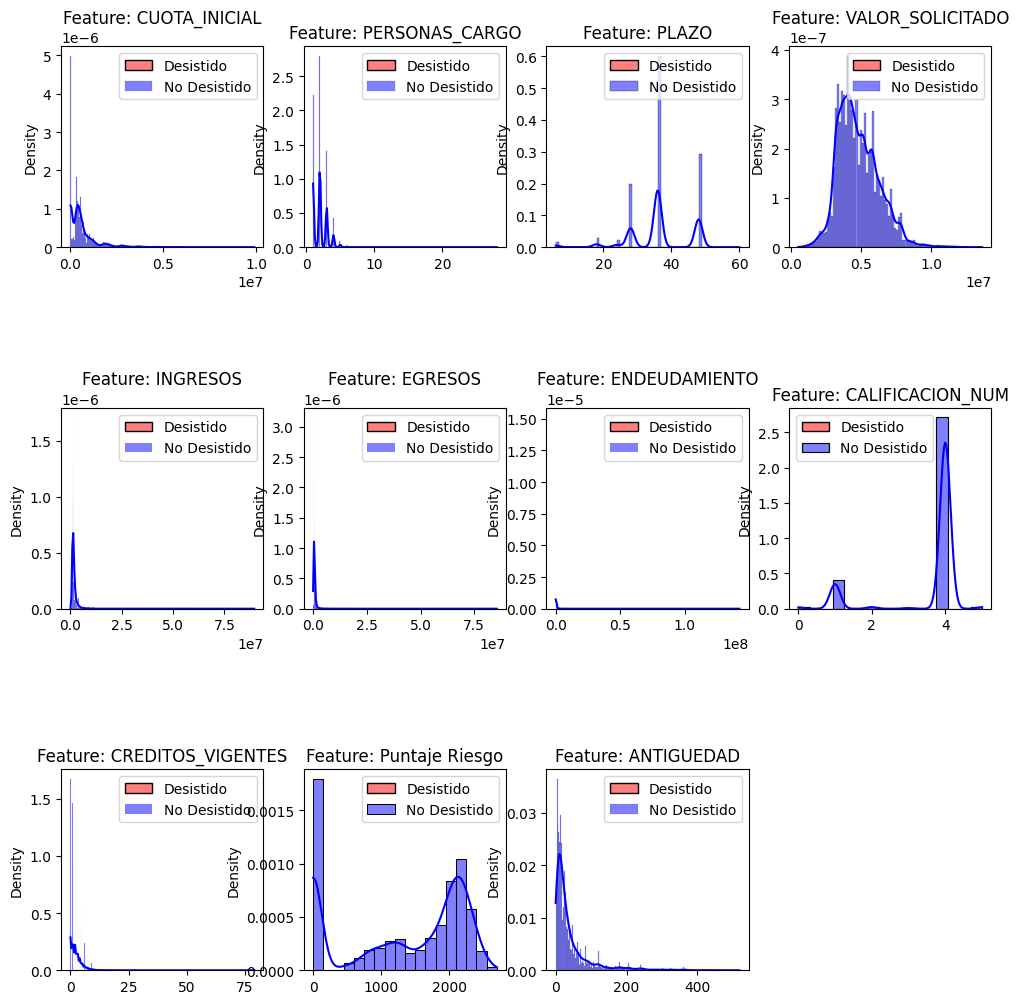

In [ ]:
import matplotlib.gridspec as gridspec

# Eliminar 'class' primero
features = data_final.drop("Desistio", axis=1)

# Filtrar solo columnas numéricas
features = features.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 4 * (len(features.columns) // 4 + 1)))
gs = gridspec.GridSpec(len(features.columns) // 4 + 1, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features.columns):
    ax = plt.subplot(gs[i])
    sns.histplot(data=data_final[data_final["Desistio"] == "Desistido"], x=f, kde=True, color="red", stat="density", label="Desistido", alpha=0.5)
    sns.histplot(data=data_final[data_final["Desistio"] == "No Desistido"], x=f, kde=True, color="blue", stat="density", label="No Desistido", alpha=0.5)
    ax.set_xlabel('')
    ax.set_title(f"Feature: {f}")
    ax.legend()

plt.tight_layout()
plt.show()

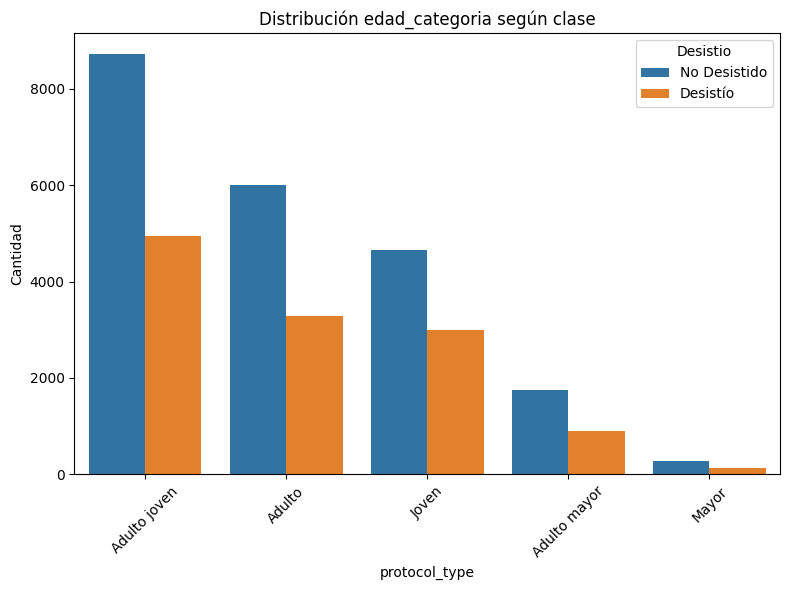

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_final, x='edad_categoria', hue='Desistio', order=dataset['edad_categoria'].value_counts().index)
plt.title('Distribución edad_categoria según clase')
plt.xlabel('protocol_type')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

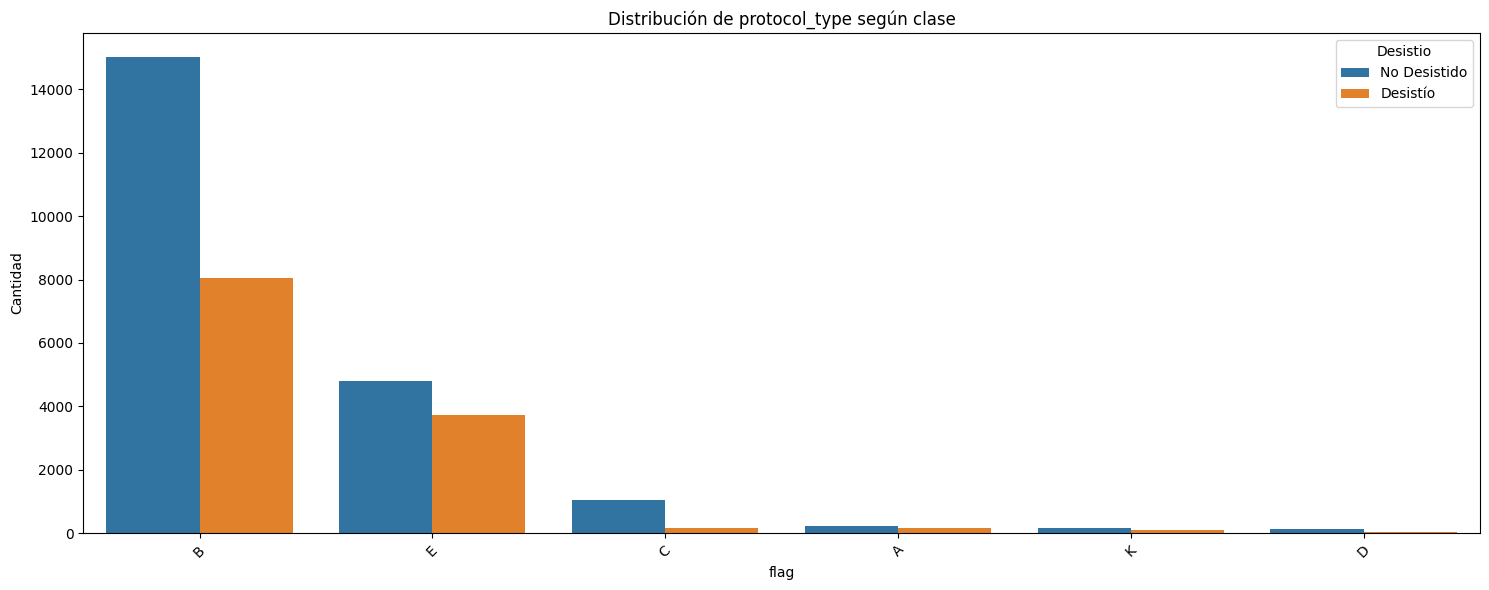

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data_final, x='HABITO_PAGO', hue='Desistio', order=dataset['HABITO_PAGO'].value_counts().index)
plt.title('Distribución de protocol_type según clase')
plt.xlabel('flag')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **OneHotEncoder (Variables Categoricas) y Escalar de datos (Variables númericas)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Se elimiiar la varible Target Desistio de Primero
features = data_final.drop("Desistio", axis=1)

categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Variables Categoricas
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(dataset[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=data_final.index)

In [ ]:
# Variables númericas
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data_final[numeric_cols])
scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=data_final.index)

In [ ]:
# Unificamos matriz OneHotEncoder y Escalado de numericas
df_final_escalado = pd.concat([scaled_df, encoded_df], axis=1)

In [ ]:
df_final_escalado['Desistio'] = data_final['Desistio']

In [ ]:
pd.set_option('display.max_columns', None)
df_final_escalado.head()

,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CALIFICACION_NUM,CREDITOS_VIGENTES,Puntaje Riesgo,ANTIGUEDAD,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday,multas_codi_No,multas_codi_Sí,edad_categoria_Adulto,edad_categoria_Adulto joven,edad_categoria_Adulto mayor,edad_categoria_Joven,edad_categoria_Mayor,GENERO_F,GENERO_M,ESTADO_CIVIL_Casado,ESTADO_CIVIL_Divorciado,ESTADO_CIVIL_Soltero,ESTADO_CIVIL_Unión Libre,ESTADO_CIVIL_Viudo,NIVEL_ESTUDIO_CODI_Ninguno,NIVEL_ESTUDIO_CODI_Posgrado,NIVEL_ESTUDIO_CODI_Primaria,NIVEL_ESTUDIO_CODI_Secundaria,NIVEL_ESTUDIO_CODI_Tecnólogico,NIVEL_ESTUDIO_CODI_Universitario,TIPO_VIVIENDA_CODI_Arrendada,TIPO_VIVIENDA_CODI_Familiar,TIPO_VIVIENDA_CODI_Propia,TIPO_VIVIENDA_CODI_Propia con hipoteca,ZONA_Codi_ZONA ANTIOQUIA,ZONA_Codi_ZONA CENTRO,ZONA_Codi_ZONA COSTA,ZONA_Codi_ZONA EJE CAFETERO,ZONA_Codi_ZONA ORIENTE,ZONA_Codi_ZONA SUROCCIDENTE,CODEUDOR_No,CODEUDOR_Si,SUBTIPO_CLIENTE_FORM,SUBTIPO_CLIENTE_INFO,TIPO_CLIENTE_Empleado,TIPO_CLIENTE_Independiente con Establecimiento,TIPO_CLIENTE_Independiente sin Establecimiento,HABITO_PAGO_A,HABITO_PAGO_B,HABITO_PAGO_C,HABITO_PAGO_D,HABITO_PAGO_E,HABITO_PAGO_K,TIPO_CONTRATO_Carrera Administrati,TIPO_CONTRATO_INDEPENDIENTE CON ESTABLECIMIENTO,TIPO_CONTRATO_INDEPENDIENTE SIN ESTABLECIMIENTO,TIPO_CONTRATO_Indefinido,TIPO_CONTRATO_Libre Nombramiento,TIPO_CONTRATO_Otra,TIPO_CONTRATO_Por Obra o Labor,TIPO_CONTRATO_Propiedad,TIPO_CONTRATO_Provisionalidad,TIPO_CONTRATO_Temporal,TIPO_CONTRATO_Término Fijo,Marca producto_Marca A,Marca producto_Marca B,Marca producto_Marca C,Marca producto_Marca D,Marca producto_Marca E,Marca producto_Marca F,Marca producto_Marca G,Desistio
0,-0.819992,-0.041572,1.362759,-0.217071,-0.275608,-0.099725,-0.178896,0.431830,-0.16406,0.893038,-0.522582,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No Desistido
1,0.530603,-1.030709,1.362759,0.317220,-0.232371,-0.274210,0.550725,-2.267717,2.55768,0.840128,1.651918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Desistío
2,-0.203416,-1.030709,-0.047522,0.086406,-0.449711,-0.357298,0.177430,-2.267717,1.78004,0.764069,0.429885,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No Desistido
3,-0.819992,-0.041572,-0.047522,-0.217071,-0.408999,-0.232666,-0.199780,0.431830,-0.16406,0.605339,-0.486640,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No Desistido
4,3.971683,0.947566,1.362759,1.863101,0.111622,0.365568,-0.231758,0.431830,-0.16406,-1.517685,1.651918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No Desistido


In [ ]:
df_final_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 80 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   CUOTA_INICIAL                                    33668 non-null  float64
 1   PERSONAS_CARGO                                   33668 non-null  float64
 2   PLAZO                                            33668 non-null  float64
 3   VALOR_SOLICITADO                                 33668 non-null  float64
 4   INGRESOS                                         33668 non-null  float64
 5   EGRESOS                                          33668 non-null  float64
 6   ENDEUDAMIENTO                                    33668 non-null  float64
 7   CALIFICACION_NUM                                 33668 non-null  float64
 8   CREDITOS_VIGENTES                                33668 non-null  float64
 9   Puntaje Riesgo              

# **División del conjunto de datos**

In [ ]:
# Dividir los datos en conjuntos temporales (80% de los datos)
from sklearn.model_selection import train_test_split

# 1. Dividir en 80% train_val y 20% test
temp_set, test_set = train_test_split(df_final_escalado, test_size=0.2, random_state=42)

In [ ]:
# Dividir el conjunto temporal en conjuntos de entrenamiento (60% del total) y validación (20% del total)
train_set, val_set = train_test_split(temp_set, test_size=0.25, random_state=42)

In [ ]:
# Mostrar las dimensiones de cada conjunto
print("Dimensiones del conjunto de entrenamiento:", train_set.shape)
print("Dimensiones del conjunto de validación:", val_set.shape)
print("Dimensiones del conjunto de prueba:", test_set.shape)

Dimensiones del conjunto de entrenamiento: (20200, 80)
Dimensiones del conjunto de validación: (6734, 80)
Dimensiones del conjunto de prueba: (6734, 80)


In [ ]:
print("Longitud del conjunto de entrenamiento::", len(train_set))
print("Longitud del conjunto de validación:", len(val_set))
print("Longitud del conjunto de prueba:", len(test_set))

Longitud del conjunto de entrenamiento:: 20200
Longitud del conjunto de validación: 6734
Longitud del conjunto de prueba: 6734


In [ ]:
# Conjunto de datos general
X_df = df_final_escalado.drop("Desistio", axis=1)
y_df = df_final_escalado["Desistio"].copy()

In [ ]:
# Conjunto de datos temp
X_temp = temp_set.drop("Desistio", axis=1)
y_temp = temp_set["Desistio"].copy()

In [ ]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Desistio", axis=1)
y_train = train_set["Desistio"].copy()

In [ ]:
# Conjunto de datos de validación
X_val = val_set.drop("Desistio", axis=1)
y_val = val_set["Desistio"].copy()

In [ ]:
# Conjunto de datos de pruebas
X_test = test_set.drop("Desistio", axis=1)
y_test = test_set["Desistio"].copy()

# **Revisión Balance de datos**

In [ ]:
tabla_y_temp = pd.DataFrame({
    'Frecuencia': y_temp.value_counts(dropna=False),
    'Porcentaje (%)': (y_temp.value_counts(normalize=True,dropna=False) * 100).round(1)
})

tabla_y_temp.loc['Total'] = [
    tabla_y_temp['Frecuencia'].sum(),
    tabla_y_temp['Porcentaje (%)'].sum()
]

tabla_y_temp

,Frecuencia,Porcentaje (%)
Desistio,,
No Desistido,17126.0,63.6
Desistío,9808.0,36.4
Total,26934.0,100.0


<ipython-input-65-2e4d5bbbb5f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_temp, palette='Set2')


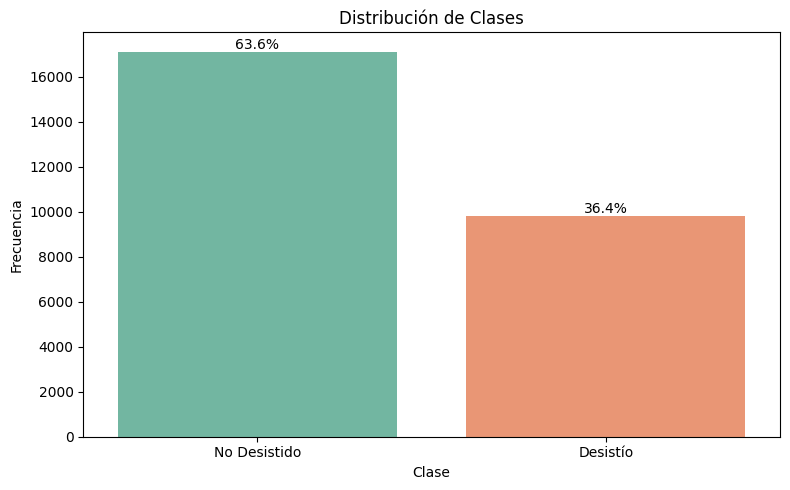

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_temp, palette='Set2')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Mostrar porcentajes encima de las barras
total = len(y_temp)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(porcentaje, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


## **Tratamiento Balanceo de datos**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_temp_resampled, y_temp_resampled = smote.fit_resample(X_temp, y_temp)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_temp_resampled.head()

,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CALIFICACION_NUM,CREDITOS_VIGENTES,Puntaje Riesgo,ANTIGUEDAD,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday,multas_codi_No,multas_codi_Sí,edad_categoria_Adulto,edad_categoria_Adulto joven,edad_categoria_Adulto mayor,edad_categoria_Joven,edad_categoria_Mayor,GENERO_F,GENERO_M,ESTADO_CIVIL_Casado,ESTADO_CIVIL_Divorciado,ESTADO_CIVIL_Soltero,ESTADO_CIVIL_Unión Libre,ESTADO_CIVIL_Viudo,NIVEL_ESTUDIO_CODI_Ninguno,NIVEL_ESTUDIO_CODI_Posgrado,NIVEL_ESTUDIO_CODI_Primaria,NIVEL_ESTUDIO_CODI_Secundaria,NIVEL_ESTUDIO_CODI_Tecnólogico,NIVEL_ESTUDIO_CODI_Universitario,TIPO_VIVIENDA_CODI_Arrendada,TIPO_VIVIENDA_CODI_Familiar,TIPO_VIVIENDA_CODI_Propia,TIPO_VIVIENDA_CODI_Propia con hipoteca,ZONA_Codi_ZONA ANTIOQUIA,ZONA_Codi_ZONA CENTRO,ZONA_Codi_ZONA COSTA,ZONA_Codi_ZONA EJE CAFETERO,ZONA_Codi_ZONA ORIENTE,ZONA_Codi_ZONA SUROCCIDENTE,CODEUDOR_No,CODEUDOR_Si,SUBTIPO_CLIENTE_FORM,SUBTIPO_CLIENTE_INFO,TIPO_CLIENTE_Empleado,TIPO_CLIENTE_Independiente con Establecimiento,TIPO_CLIENTE_Independiente sin Establecimiento,HABITO_PAGO_A,HABITO_PAGO_B,HABITO_PAGO_C,HABITO_PAGO_D,HABITO_PAGO_E,HABITO_PAGO_K,TIPO_CONTRATO_Carrera Administrati,TIPO_CONTRATO_INDEPENDIENTE CON ESTABLECIMIENTO,TIPO_CONTRATO_INDEPENDIENTE SIN ESTABLECIMIENTO,TIPO_CONTRATO_Indefinido,TIPO_CONTRATO_Libre Nombramiento,TIPO_CONTRATO_Otra,TIPO_CONTRATO_Por Obra o Labor,TIPO_CONTRATO_Propiedad,TIPO_CONTRATO_Provisionalidad,TIPO_CONTRATO_Temporal,TIPO_CONTRATO_Término Fijo,Marca producto_Marca A,Marca producto_Marca B,Marca producto_Marca C,Marca producto_Marca D,Marca producto_Marca E,Marca producto_Marca F,Marca producto_Marca G
0,-0.445349,-0.041572,1.362759,-1.234361,-0.314821,-0.315754,0.148063,-2.267717,0.22476,0.922800,-0.073305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.080101,1.936703,-0.047522,0.759612,-0.191653,0.191083,0.028635,0.431830,0.61358,0.482984,-0.270987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.690805,0.947566,-0.047522,1.023196,-0.040015,-0.315754,-0.231758,0.431830,0.61358,0.727694,-0.324900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.819992,1.936703,-2.162943,-0.359549,-0.380946,-0.357298,-0.212832,0.431830,0.22476,-0.935672,-0.109247,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.759617,-1.030709,1.362759,1.104408,0.212714,-0.191122,0.071054,0.431830,0.22476,0.439994,-0.684322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Modelamiento - Regresión Logística**

## Regresión Logística (Un testeo)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Crear el clasificador
#clf = RandomForestClassifier(random_state=42)
clf = LogisticRegression(random_state=42)
#clf = SVC(probability=True, random_state=42)
#clf = LGBMClassifier(random_state=42)
#clf= XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#clf = LogisticRegression()
clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
y_pred = clf.predict(X_val)

## **Evaluación de Modelo**

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[1509  929]
 [1931 2365]]


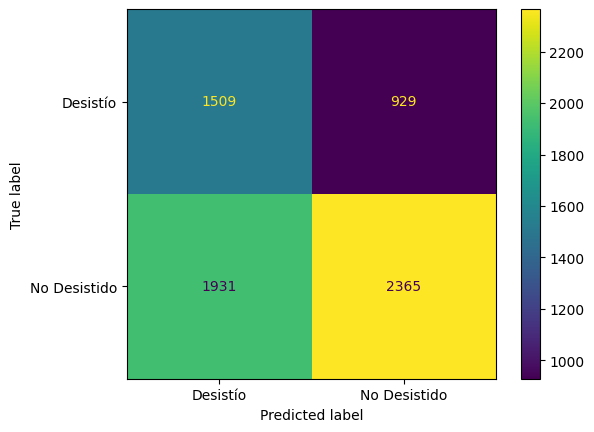

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, values_format='d')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Reporte de clasificación (precision, recall, f1, support)
print("\nReporte de Clasificación:\n", classification_report(y_val, y_pred))

# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)


Reporte de Clasificación:
               precision    recall  f1-score   support

    Desistío       0.44      0.62      0.51      2438
No Desistido       0.72      0.55      0.62      4296

    accuracy                           0.58      6734
   macro avg       0.58      0.58      0.57      6734
weighted avg       0.62      0.58      0.58      6734

Accuracy: 0.5752895752895753


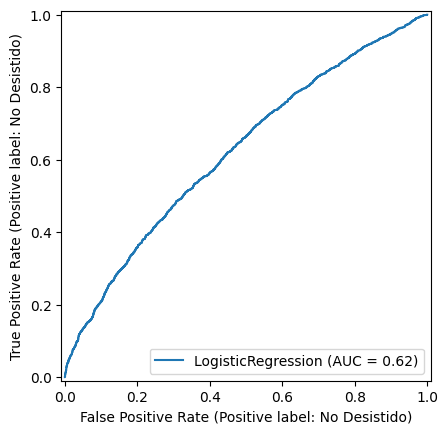

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_val, y_val)

## **Reporte al Equipo Comercial/Puesta en producción**

In [ ]:
y_pred = clf.predict(X_test)

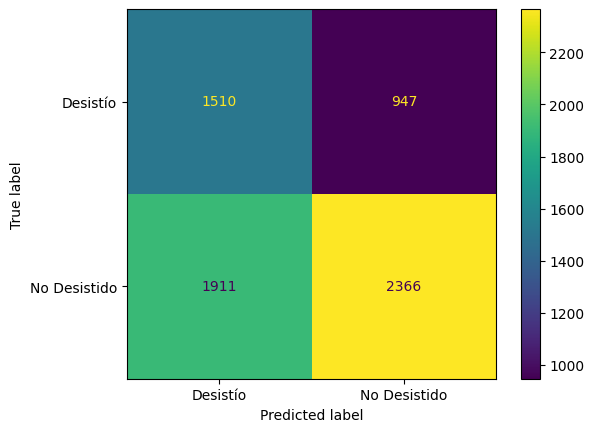

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, values_format='d')

In [ ]:
# Reporte de clasificación (precision, recall, f1, support)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Reporte de Clasificación:
               precision    recall  f1-score   support

    Desistío       0.44      0.61      0.51      2457
No Desistido       0.71      0.55      0.62      4277

    accuracy                           0.58      6734
   macro avg       0.58      0.58      0.57      6734
weighted avg       0.61      0.58      0.58      6734

Accuracy: 0.5755865755865756


In [ ]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_test, y_pred, pos_label='Desistío'))

F1 score: 0.5137801973460361


## **Random Forest + Cross Validation**

In [ ]:
estimator1 = LogisticRegression(random_state=42)
estimator1.fit(X_temp_resampled, y_temp_resampled)

LogisticRegression(random_state=42)

In [ ]:
z1 = cross_validate(estimator1, X_temp_resampled, y_temp_resampled, return_train_score=True, return_estimator=False,
                       scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.25))

In [ ]:
# Diccionario de python
z1

{'fit_time': array([2.73666835, 2.55614901, 1.84674191, 1.85078549, 1.94344258,
        1.43520689, 1.92208409, 3.02604699, 2.18465781, 1.77891707]),
 'score_time': array([0.11185145, 0.06383514, 0.07455277, 0.03377271, 0.03309512,
        0.08937502, 0.04472041, 0.09990549, 0.06023765, 0.03456593]),
 'test_score': array([0.59803807, 0.59383394, 0.59325003, 0.59196543, 0.58437464,
        0.58285648, 0.58752774, 0.58635992, 0.59418428, 0.59465141]),
 'train_score': array([0.59640313, 0.59932267, 0.59574137, 0.5985052 , 0.59690918,
        0.59768773, 0.59971194, 0.60095761, 0.59441784, 0.5972206 ])}

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) con %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) con %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

report_cv_score(z1)

test score   0.591 (±0.0048) con 10 splits
train score  0.598 (±0.0019) con 10 splits


# **Curvas de Aprendizaje**

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25)
def plot_learning_curve(estimator1,  X_temp_resampled, y_temp_resampled, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(estimator1,X_temp_resampled, y_temp_resampled, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Definir el modelo
estimator1 = RandomForestClassifier(random_state=42)
# Trazar la curva de aprendizaje
plot_learning_curve(estimator1,  X_temp_resampled, y_temp_resampled, scoring='accuracy')

KeyboardInterrupt: 

## **Selección Características**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimador1 = RandomForestClassifier(random_state=42)
estimador1.fit(X_temp_resampled, y_temp_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
estimator1.feature_importances_

array([186,  58,  91, 220, 312, 314, 210,  23, 191, 205, 187,  24,  26,
        14,   0,  27,  33,  32,  16,   0,  25,  25,  13,  48,   4,  35,
         1,  22,  22,   3,   0,  26,   0,   3,  19,   9,  26,  19,   8,
         0,  36,  16,  30,  28,  17,  54,  12,  35,   6,  28,  35,   2,
         7,   5,  15,   6,   6,  26,   5,  16,   0,   0,   0,   9,   8,
         2,  15,  21,   3,   0,   0,   0,  58,   4,   5,   7,   2,   0,
         4], dtype=int32)

In [ ]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(df_final_escalado), estimator1.feature_importances_)}

In [ ]:
feature_importances_sorted = pd.Series(feature_importances,  name="Importancia").sort_values(ascending=False)
feature_importances_sorted

,Importancia
INGRESOS,0.074577
CUOTA_INICIAL,0.066507
VALOR_SOLICITADO,0.066419
Puntaje Riesgo,0.064640
EGRESOS,0.061336
...,...
TIPO_CONTRATO_Carrera Administrati,0.000170
TIPO_VIVIENDA_CODI_Familiar,0.000150
TIPO_CONTRATO_Provisionalidad,0.000138
TIPO_CONTRATO_Término Fijo,0.000038


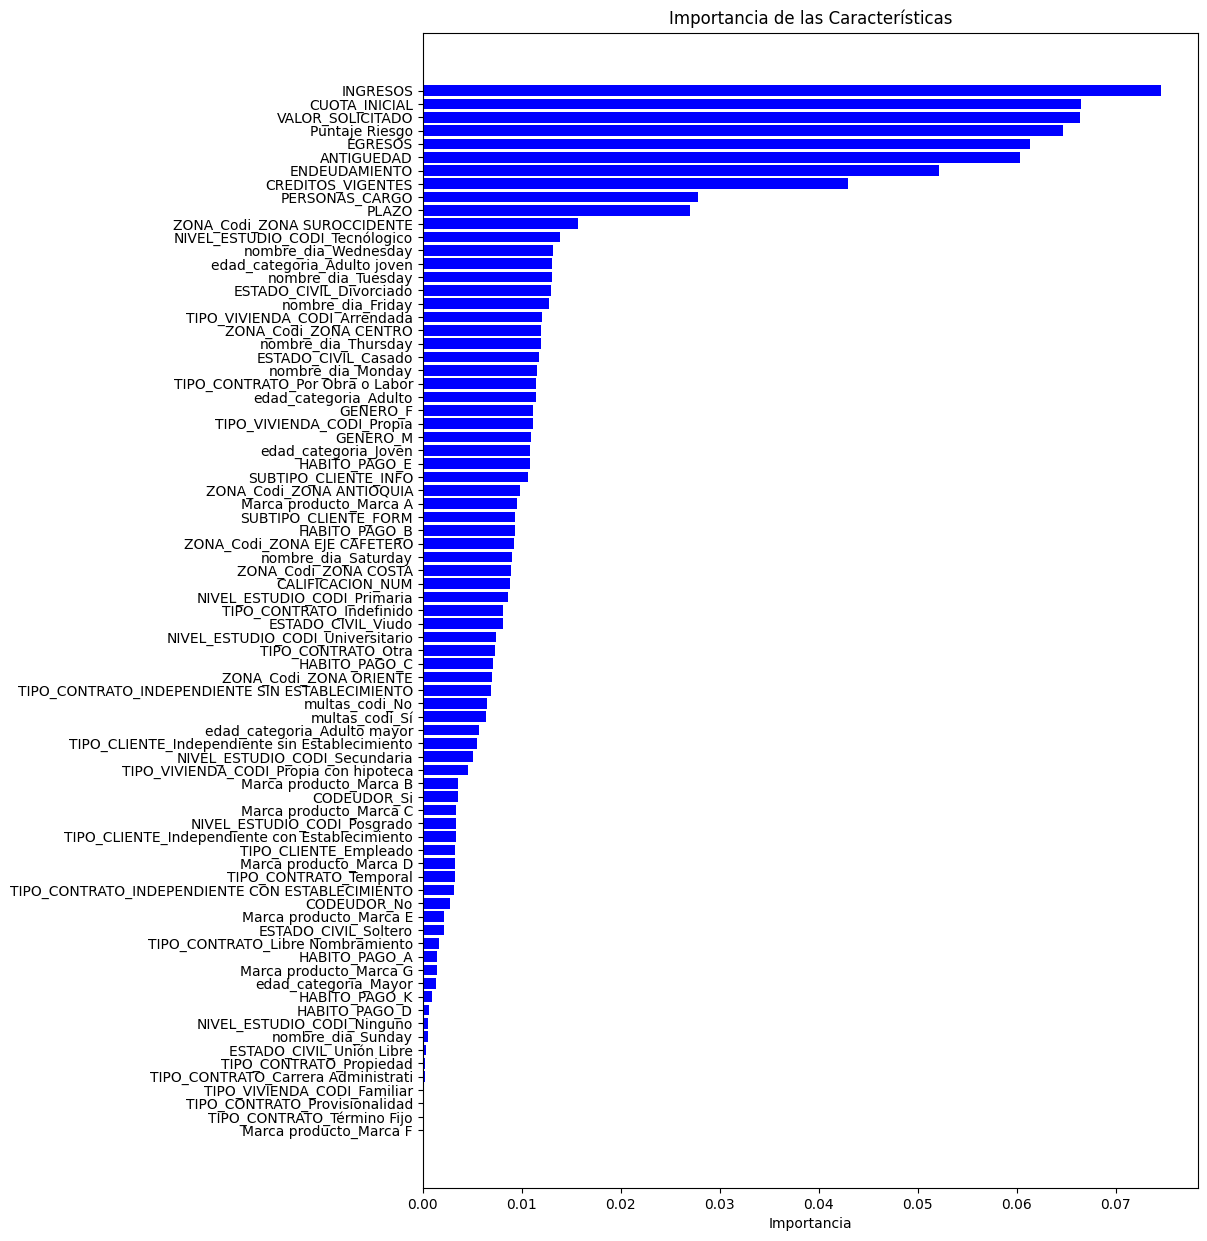

In [ ]:
# Obtener la importancia de las características
importances = estimator1.feature_importances_
features = X_df.columns

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ordenar el DataFrame por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Seleccionar las 4 características más importantes
top_features = feature_importances

# Visualizar las características más importantes
plt.figure(figsize=(10, 15))
plt.title("Importancia de las Características")
plt.barh(top_features['Feature'], top_features['Importance'], color='b')
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Extraemos las 4 caracteristicas con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(30).index)

In [ ]:
columns

['INGRESOS',
 'CUOTA_INICIAL',
 'VALOR_SOLICITADO',
 'Puntaje Riesgo',
 'EGRESOS',
 'ANTIGUEDAD',
 'ENDEUDAMIENTO',
 'CREDITOS_VIGENTES',
 'PERSONAS_CARGO',
 'PLAZO',
 'ZONA_Codi_ZONA SUROCCIDENTE',
 'NIVEL_ESTUDIO_CODI_Tecnólogico',
 'nombre_dia_Wednesday',
 'edad_categoria_Adulto joven',
 'nombre_dia_Tuesday',
 'ESTADO_CIVIL_Divorciado',
 'nombre_dia_Friday',
 'TIPO_VIVIENDA_CODI_Arrendada',
 'ZONA_Codi_ZONA CENTRO',
 'nombre_dia_Thursday',
 'ESTADO_CIVIL_Casado',
 'nombre_dia_Monday',
 'TIPO_CONTRATO_Por Obra o Labor',
 'edad_categoria_Adulto',
 'GENERO_F',
 'TIPO_VIVIENDA_CODI_Propia',
 'GENERO_M',
 'edad_categoria_Joven',
 'HABITO_PAGO_E',
 'SUBTIPO_CLIENTE_INFO']

In [ ]:
X_temp_reduced = X_temp_resampled[columns].copy()
X_train_reduced = X_train_resampled[columns].copy()
X_val_reduced = X_val[columns].copy()
X_test_reduced = X_test[columns].copy()

In [ ]:
X_temp_reduced.head()

,INGRESOS,CUOTA_INICIAL,VALOR_SOLICITADO,Puntaje Riesgo,EGRESOS,ANTIGUEDAD,ENDEUDAMIENTO,CREDITOS_VIGENTES,PERSONAS_CARGO,PLAZO,ZONA_Codi_ZONA SUROCCIDENTE,NIVEL_ESTUDIO_CODI_Tecnólogico,nombre_dia_Wednesday,edad_categoria_Adulto joven,nombre_dia_Tuesday,ESTADO_CIVIL_Divorciado,nombre_dia_Friday,TIPO_VIVIENDA_CODI_Arrendada,ZONA_Codi_ZONA CENTRO,nombre_dia_Thursday,ESTADO_CIVIL_Casado,nombre_dia_Monday,TIPO_CONTRATO_Por Obra o Labor,edad_categoria_Adulto,GENERO_F,TIPO_VIVIENDA_CODI_Propia,GENERO_M,edad_categoria_Joven,HABITO_PAGO_E,SUBTIPO_CLIENTE_INFO
0,-0.314821,-0.445349,-1.234361,0.922800,-0.315754,-0.073305,0.148063,0.22476,-0.041572,1.362759,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,-0.191653,-0.080101,0.759612,0.482984,0.191083,-0.270987,0.028635,0.61358,1.936703,-0.047522,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,-0.040015,-0.690805,1.023196,0.727694,-0.315754,-0.324900,-0.231758,0.61358,0.947566,-0.047522,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.380946,-0.819992,-0.359549,-0.935672,-0.357298,-0.109247,-0.212832,0.22476,1.936703,-2.162943,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.212714,0.759617,1.104408,0.439994,-0.191122,-0.684322,0.071054,0.22476,-1.030709,1.362759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_temp_reduced.columns.tolist())

['INGRESOS', 'CUOTA_INICIAL', 'VALOR_SOLICITADO', 'Puntaje Riesgo', 'EGRESOS', 'ANTIGUEDAD', 'ENDEUDAMIENTO', 'CREDITOS_VIGENTES', 'PERSONAS_CARGO', 'PLAZO', 'ZONA_Codi_ZONA SUROCCIDENTE', 'NIVEL_ESTUDIO_CODI_Tecnólogico', 'nombre_dia_Wednesday', 'edad_categoria_Adulto joven', 'nombre_dia_Tuesday', 'ESTADO_CIVIL_Divorciado', 'nombre_dia_Friday', 'TIPO_VIVIENDA_CODI_Arrendada', 'ZONA_Codi_ZONA CENTRO', 'nombre_dia_Thursday', 'ESTADO_CIVIL_Casado', 'nombre_dia_Monday', 'TIPO_CONTRATO_Por Obra o Labor', 'edad_categoria_Adulto', 'GENERO_F', 'TIPO_VIVIENDA_CODI_Propia', 'GENERO_M', 'edad_categoria_Joven', 'HABITO_PAGO_E', 'SUBTIPO_CLIENTE_INFO']


In [ ]:
estimator1 = RandomForestClassifier(random_state=42)
z1 = cross_validate(estimator1, X_temp_reduced, y_temp_resampled, return_train_score=True, return_estimator=False,
                       scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.25))

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) con %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) con %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

report_cv_score(z1)

test score   0.755 (±0.0053) con 10 splits
train score  0.998 (±0.0001) con 10 splits
